In [2]:
import random

random_numbers = random.sample(range(1, 69), 25)
print(random_numbers)

[33, 30, 25, 37, 4, 66, 43, 35, 48, 47, 46, 42, 19, 12, 60, 53, 55, 26, 49, 14, 58, 15, 11, 36, 3]


In [37]:
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import os

random_numbers = [33, 30, 25, 37, 4, 66, 43, 35, 48, 47, 46, 42, 19, 12, 60, 53, 55, 26, 49, 14, 58, 15, 11, 36, 3]

# 数据文件夹的路径
data_dir = "PIE"  # 请替换成包含所有子文件夹的实际路径

my_data_dir = "0I_bw"  # 您自己的数据文件夹

# 用于存储所选的文件夹
selected_folders = []

# 遍历数据文件夹，选择与随机数字相对应的文件夹
for folder_name in os.listdir(data_dir):
    if int(folder_name) in random_numbers:
        selected_folders.append(folder_name)

# 加载数据
data = []
labels = []

for folder_name in selected_folders:
    folder_path = os.path.join(data_dir, folder_name)
    label = int(folder_name)

    image_files = os.listdir(folder_path)
    random.shuffle(image_files)

    for image_filename in image_files[:]:
        image_path = os.path.join(folder_path, image_filename)
        data.append(image_path)
        labels.append(label)

# 从0I_bw文件夹中加载数据
my_data = []
my_labels = []

my_image_files = os.listdir(my_data_dir)
random.shuffle(my_image_files)

for image_filename in my_image_files[:]:
    image_path = os.path.join(my_data_dir, image_filename)
    my_data.append(image_path)
    my_labels.append(0)

# 合并数据和标签
data += my_data
labels += my_labels

# 向量化图像数据
images = [plt.imread(image_path) for image_path in data]
X = np.array(images).reshape(len(images), -1)

print(X.shape)

(4260, 1024)


<Figure size 2000x1000 with 0 Axes>

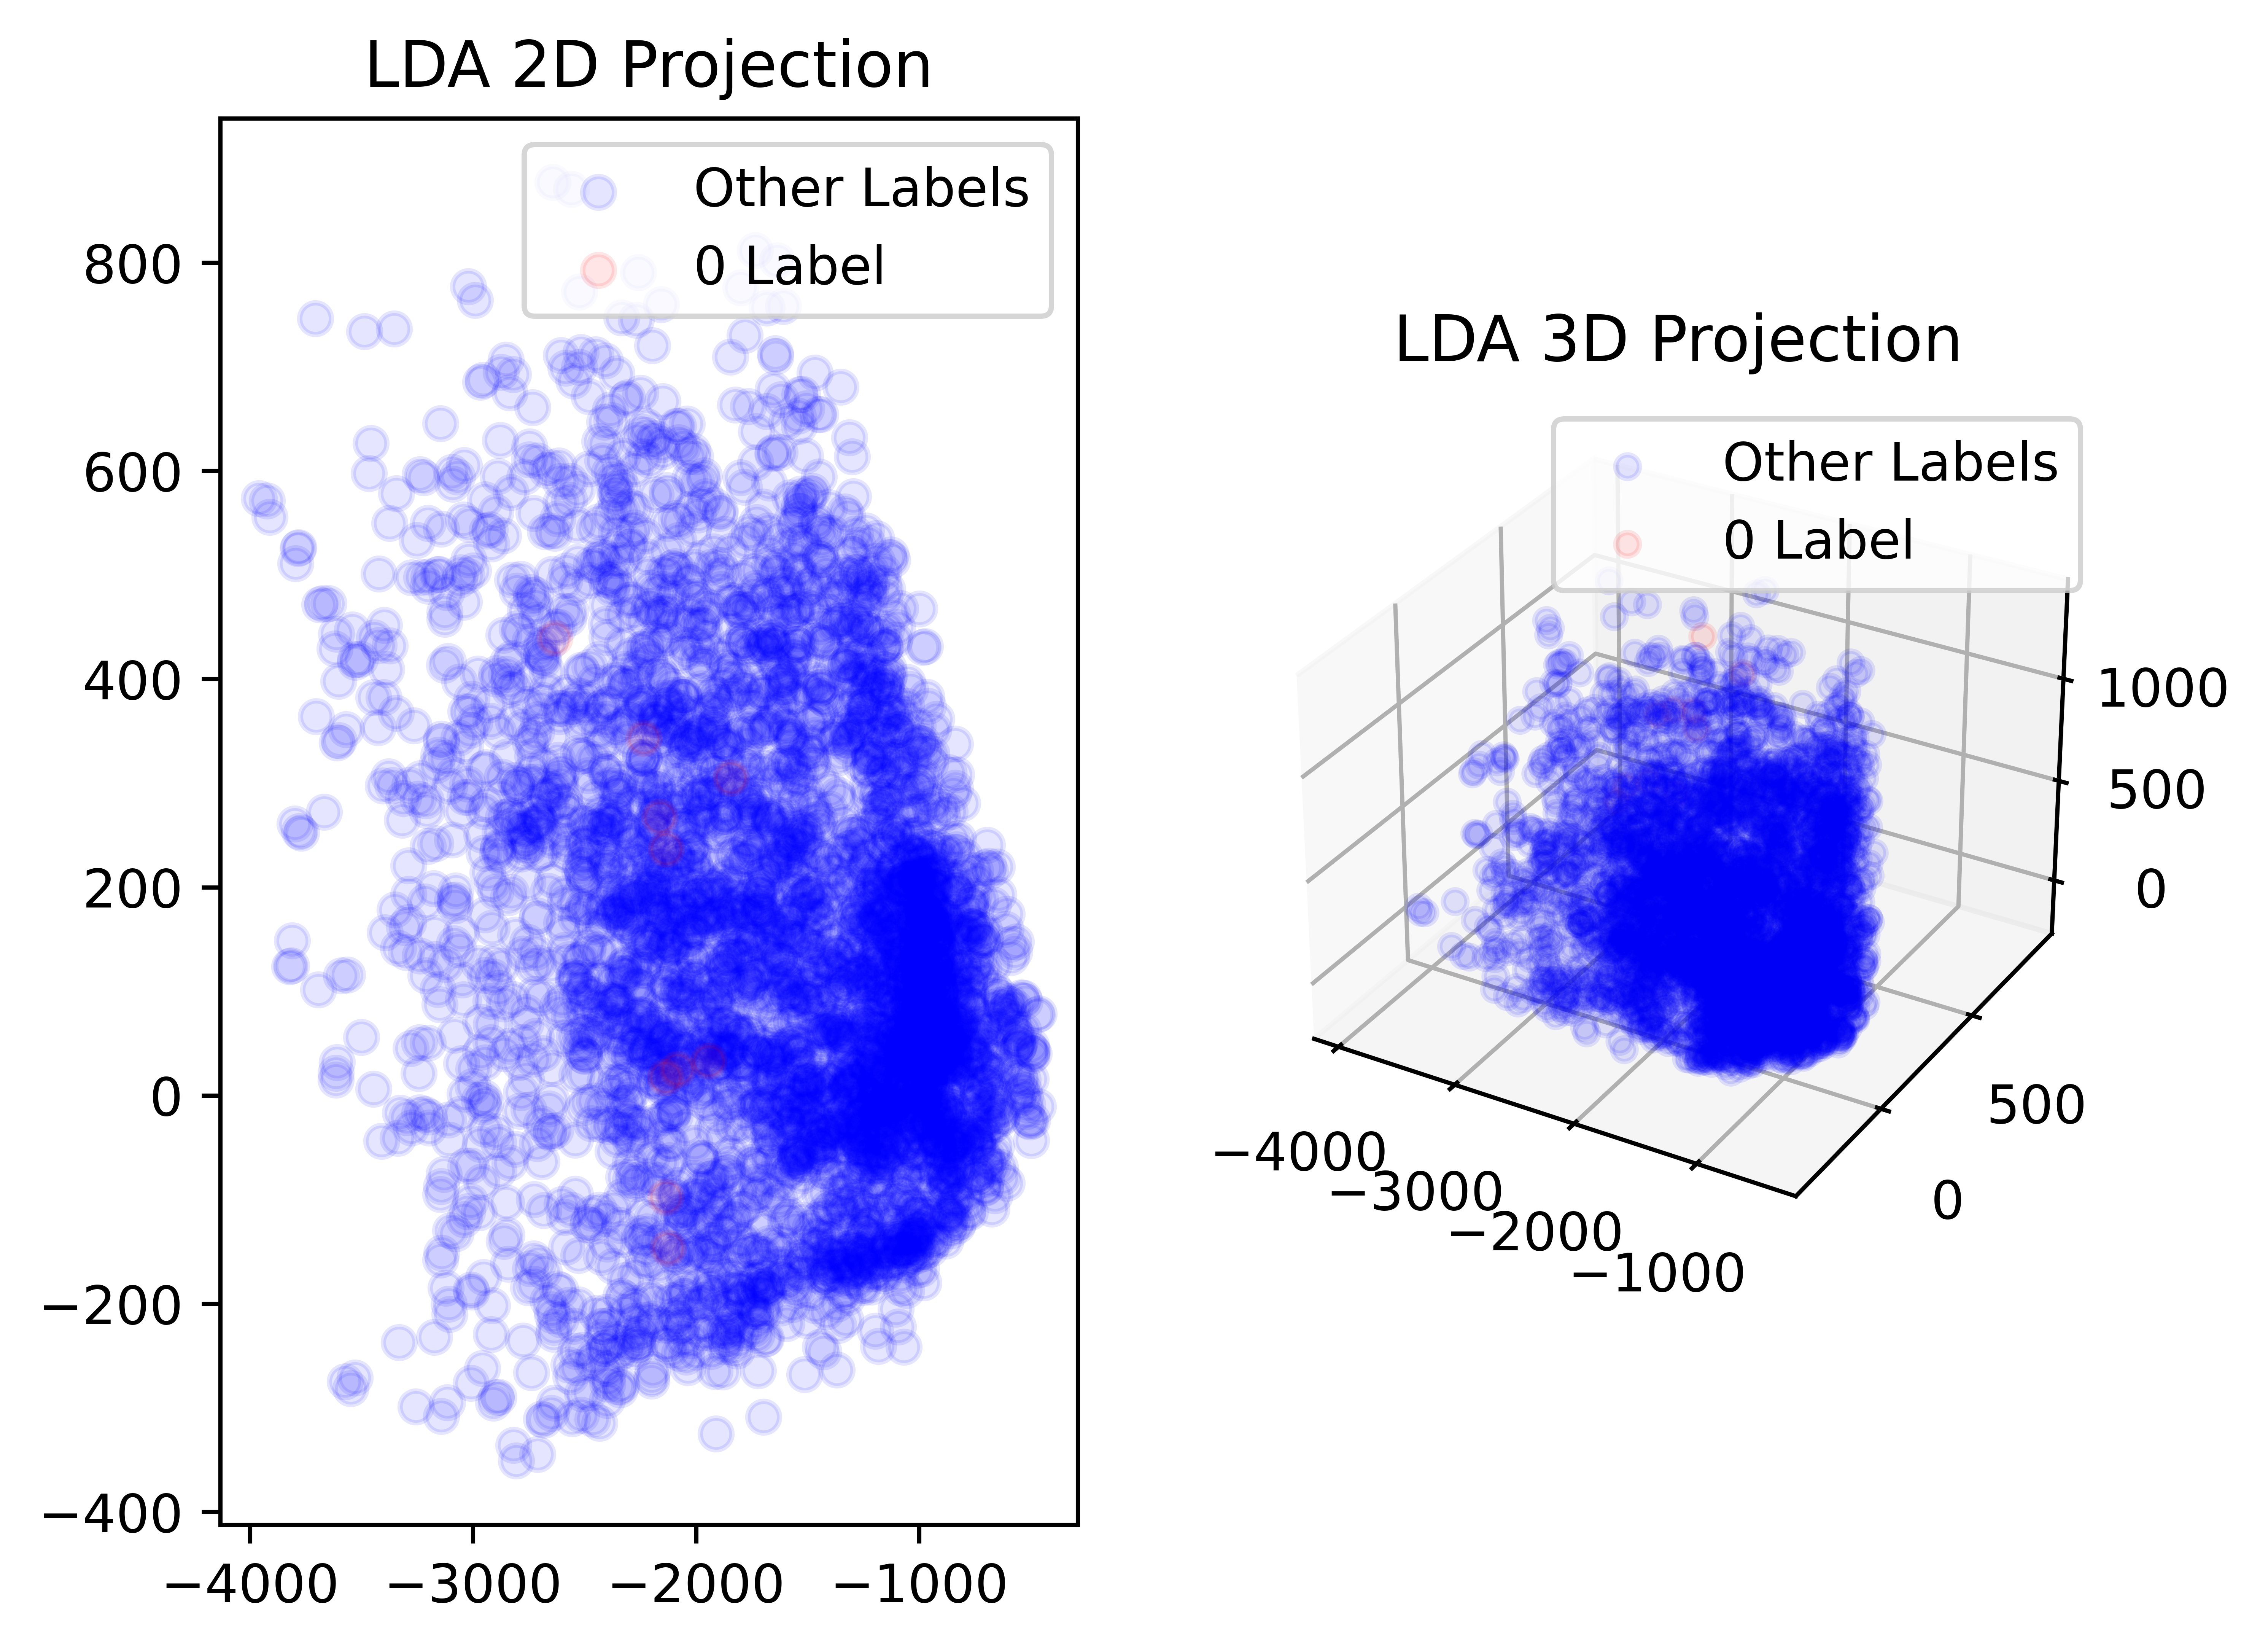

In [38]:
# def My_LDA(data, label, n_components):
#     # print(label)
#     Flabel = np.unique(label)
#     # print(label, Flabel)
#     overall_mean = np.mean(data, axis=0)
#     # print('overall_mean: ', overall_mean.shape, overall_mean)
        
#     # 初始化类内散布矩阵（Sw）和类间散布矩阵（Sb）
#     Sw = np.zeros((data.shape[1], data.shape[1]), dtype=np.float32)
#     Sb = np.zeros((data.shape[1], data.shape[1]), dtype=np.float32)

#     # 计算类内散布矩阵和类间散布矩阵
#     for cls in Flabel:
#         # print(cls)
#         num = np.sum(label == cls)
#         # print('num', num)
#         data_cls = data[label == cls]
#         # print(data_cls)
#         mean = np.mean(data_cls, axis=0)
#         print(data_cls.shape, mean)
#         Sw = Sw + np.mat(data_cls - mean).T @ np.mat(data_cls - mean)
#         Sb = Sb + num * np.mat(mean - overall_mean).T @ np.mat(mean - overall_mean)   
    
#     # 计算特征值和特征向量
#     eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(Sw) @ Sb)
#     eigenvectors = np.real(eigenvectors)
    
#     # 获取特征值从大到小排序的索引
#     sorted_indices = np.argsort(eigenvalues)[::-1]

#     # 选择前 n_components 个特征向量
#     top_n_eigenvectors = eigenvectors[:, sorted_indices[:n_components]]
#     return X.dot(top_n_eigenvectors)

def My_LDA(data, label, n_components):
    unique_labels = np.unique(label)
    overall_mean = np.mean(data, axis=0)
        
    # 初始化类内散布矩阵（Sw）和类间散布矩阵（Sb）
    num_features = data.shape[1]
    Sw = np.zeros((num_features, num_features), dtype=np.float32)
    Sb = np.zeros((num_features, num_features), dtype=np.float32)

    # 计算类内散布矩阵和类间散布矩阵
    for cls in unique_labels:
        data_cls = data[label == cls]
        # print(data_cls.shape)
        mean = np.mean(data_cls, axis=0)
        data_diff = data_cls - mean
        Sw += np.dot(data_diff.T, data_diff)
        Sb += len(data_cls) * np.outer(mean - overall_mean, mean - overall_mean)

    # 计算特征值和特征向量
    eigenvalues, eigenvectors = np.linalg.eigh(np.linalg.inv(Sw).dot(Sb))
    
    # 获取特征值从大到小排序的索引
    sorted_indices = np.argsort(eigenvalues)[::-1]

    # 选择前 n_components 个特征向量
    top_n_eigenvectors = eigenvectors[:, sorted_indices[:n_components]]
    
    # 投影数据到新的特征空间
    X_lda = np.dot(data, top_n_eigenvectors)
    
    return X_lda

X_lda_2d = My_LDA(X, labels, n_components=2)
X_lda_3d = My_LDA(X, labels, n_components=3)

# 分离"0"标签的数据
my_data_indices = [i for i, label in enumerate(labels) if label == 0]
other_data_indices = [i for i, label in enumerate(labels) if label != 0]
# print(X_lda_2d[other_data_indices, 0].shape, X_lda_2d[other_data_indices, 1].shape)

# 可视化投影后的数据，并突出显示"0"标签的点
plt.figure(figsize=(20, 10))
plt.figure(dpi=1000)  # 指定图形的分辨率（每英寸像素数）
plt.subplot(1, 2, 1)
plt.scatter(X_lda_2d[other_data_indices, 0], X_lda_2d[other_data_indices, 1], c='blue', label='Other Labels', alpha=0.1)
plt.scatter(X_lda_2d[my_data_indices, 0], X_lda_2d[my_data_indices, 1], c='red', label='0 Label', alpha=0.1)
plt.title('LDA 2D Projection')
plt.legend()

ax = plt.subplot(1, 2, 2, projection='3d')

scatter_other = ax.scatter(X_lda_3d[other_data_indices, 0], X_lda_3d[other_data_indices, 1], X_lda_3d[other_data_indices, 2], c='blue', label='Other Labels', s=20, alpha=0.1)
scatter_bw = ax.scatter(X_lda_3d[my_data_indices, 0], X_lda_3d[my_data_indices, 1], X_lda_3d[my_data_indices, 2], c='red', label='0 Label', s=20, alpha=0.1)
plt.title('LDA 3D Projection')
plt.legend(handles=[scatter_other, scatter_bw], labels=['Other Labels', '0 Label'])

plt.show()

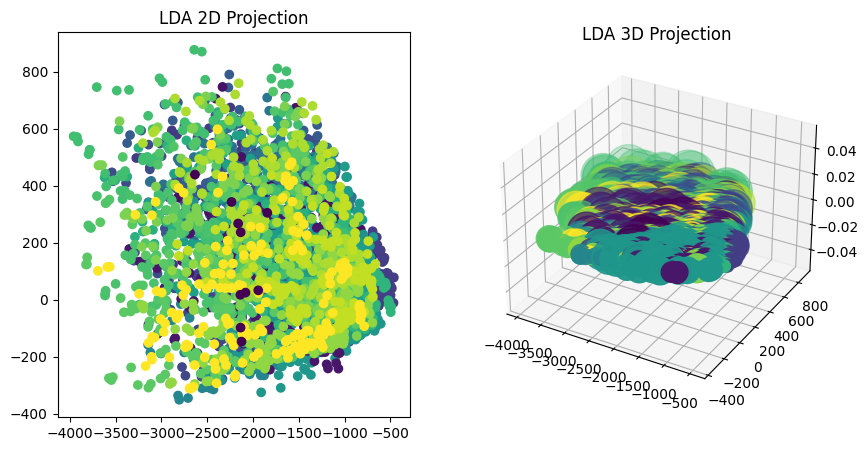

In [39]:
# 可视化投影后的数据
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_lda_2d[:, 0], X_lda_2d[:, 1], c=labels, cmap='viridis')
plt.title('LDA 2D Projection')

plt.subplot(1, 2, 2, projection='3d')
plt.scatter(X_lda_3d[:, 0], X_lda_3d[:, 1], X_lda_3d[:, 2], c=labels, cmap='viridis')
plt.title('LDA 3D Projection')

plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = 1 # KNN的参数
iter = [2, 3, 9] # 维度矩阵

knn = KNeighborsClassifier(n_neighbors=k)

for i in iter:
    X_lda = My_LDA(X, labels, n_components=i)
    X_train, X_test, y_train, y_test = train_test_split(X_lda, labels, test_size=0.3, random_state=42, stratify=labels)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # ‘我’ 的识别准确率
    my_data_indices = [i for i, label in enumerate(y_test) if label == 0]
    X_my_test = X_test[my_data_indices]
    y_my_test = [y_test[i] for i in my_data_indices]
    # 训练KNN分类器
    knn.fit(X_train, y_train)
    # 使用KNN进行预测
    y_bw_pred = knn.predict(X_my_test)
    # 计算错误率
    #print(y_my_test, y_bw_pred)
    my_accuracy = accuracy_score(y_my_test, y_bw_pred)
    print(f"accuracy: {accuracy:.3f}, Myaccuracy: {my_accuracy:.3f} in the case of dimension {i}")

accuracy: 0.156, Myaccuracy: 0.000 in the case of dimension 2
accuracy: 0.377, Myaccuracy: 0.667 in the case of dimension 3
accuracy: 0.863, Myaccuracy: 1.000 in the case of dimension 9
